In [1]:
# coding=utf-8
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# config
proj_path = '/Users/vincent/Desktop/word2Vec'
filePath = '{0}/wSeg/'.format(proj_path)
fileSegWordDonePath ='{0}/bin/SegDone.txt'.format(proj_path)
fileWord2VecBinPath ='{0}/bin/corpusWord2Vec.bin'.format(proj_path)
fileGensimModelPath ='{0}/bin/corpusGensim.model'.format(proj_path)

svgfile ='{0}/bin/vocals.svg'.format(proj_path)
fontfile = '{0}/font/wqy-microhei.ttc'.format(proj_path)

In [3]:
# get segmentated lines from files in folder
from os import walk

def getLinesFromFile(filename):
    lines = []
    with open(filename) as fileTrainRaw:
        for line in fileTrainRaw:
            lines.append(line.replace(' \n', ''))
    return lines

fileTrainSeg = []
def takeKey(elem):
    val = elem.split('.')
    try:
        resInt = int(val[0])
    except ValueError:
        resInt = 0
    return resInt

for (dirpath, dirnames, filenames) in walk(filePath):
    filenames.sort(key=takeKey)
    for filename in filenames:
        if filename == '.DS_Store':
            continue
        fullname = filePath+filename
        print(fullname)
        fileTrainSeg += getLinesFromFile(fullname)
    break
    
fileTrainSeg[0:5]

/Users/vincent/Desktop/word2Vec/wSeg/0.txt


['心 體 與 性體 一 綜論 部',
 '牟宗三',
 '第一 章 宋 明 儒學 之 課題',
 '第一 節 正名 宋 明 儒學 之 定位',
 '宋 明 六 百年 之 儒學 通常 亦 名 宋明理學 理學 之 理 字 固有 實 指 但 人 可就 表面 只 想 其 通 泛 之 意義 平常 有 詞章 義理 考據 之 分 就 易經 言 有 象數 義理 之 別 若 如此 使用 義理 則 義理 一 詞 便 甚 通 泛 其意 當是 普通 所 說 之 道理 或 理論 或 如今 日 所 說 之 廣義 之 哲學 若 依 此 意義 之 義理 想 宋明理學 之 理 字 則 太 通 泛 不能 標明 其 特質 亦 不能 使人 知 其 與 先秦 儒家 之 關係 是以 若 用 理 字 去 想 宋 明 儒學 之 所 講 則 須 有 簡別']

In [4]:
# save the segmentations into one file
with open(fileSegWordDonePath,'wb') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(fileTrainSeg[i].encode('utf-8'))
        fW.write('\n'.encode('utf-8'))

In [5]:
# # jieba seg words transform to word2vec and save model
import word2vec
# # size 200-300
word2vec.word2vec(fileSegWordDonePath, fileWord2VecBinPath, size=200, verbose=True, window=8)

Starting training using file /Users/vincent/Desktop/word2Vec/bin/SegDone.txt
Vocab size: 7782
Words in train file: 837507
Alpha: 0.000244  Progress: 100.04%  Words/thread/sec: 202.48k  : 14.95%  Words/thread/sec: 177.85k  0.018768  Progress: 25.17%  Words/thread/sec: 194.04k  195.07k  ords/thread/sec: 194.45k  ogress: 50.86%  Words/thread/sec: 197.13k  pha: 0.009887  Progress: 60.89%  Words/thread/sec: 199.45k  sec: 198.24k  7%  Words/thread/sec: 199.06k   0.002382  Progress: 90.72%  Words/thread/sec: 199.74k  

In [6]:
# # build vocabulary and train model
# from gensim.models import word2vec
# model = word2vec.Word2Vec(
#     fileTrainSeg,
#     negative=5,
#     size=250,
#     window=10,
#     min_count=2,
#     workers=10,
#     sorted_vocab=1,
#     iter=5, null_word=0, trim_rule=None,
#     min_alpha=0.0001, sg=0, hs=0, alpha=0.025,
#     max_vocab_size=None, sample=0.001, seed=1)

# model.save(fileGensimModelPath)

In [7]:
print(fileTrainSeg[0])

心 體 與 性體 一 綜論 部


In [8]:
# see the word2vector
model = word2vec.load(fileWord2VecBinPath)
# model = word2vec.Word2Vec.load(fileGensimModelPath)
print(model.vectors)

[[ 0.09913075  0.1094512  -0.09486048 ...  0.00492404 -0.04175796
  -0.02790036]
 [-0.03364626  0.01996539  0.05379092 ...  0.03781807 -0.00082398
  -0.08409981]
 [ 0.03822125 -0.03576442 -0.00097176 ... -0.01503982 -0.01941825
  -0.05158728]
 ...
 [ 0.03740453 -0.00212937  0.0441775  ...  0.03215929 -0.04548974
   0.11851659]
 [ 0.0239193   0.04433273  0.05494344 ...  0.06360213 -0.06925992
   0.00872903]
 [ 0.08490047  0.03113713 -0.01375905 ...  0.12483103  0.0027327
   0.03380105]]


In [9]:
# see the example of vocabulary from 0 to 4
for i in range(1,6):
    print(model.vocab[i])

之
而
此
是
也


In [10]:
import pandas as pd
# check correlation of the specific word

indexes = model.similar(u'相應', n=10)
wordDict = { "word": indexes[0], "probability": indexes[1] }

wordDict["word"] = model.vocab[wordDict["word"]]
pd.DataFrame(wordDict)

,word,probability
0,契,0.876625
1,正視,0.868386
2,真切,0.833039
3,悟,0.785367
4,洞,0.775651
5,精神,0.767909
6,清澈,0.756136
7,妥貼,0.753173
8,境,0.752499
9,透澈,0.749692


In [11]:
indexes = model.similar(u'牟宗三', n=10)
wordDict = { "word": indexes[0], "probability": indexes[1] }

wordDict["word"] = model.vocab[wordDict["word"]]
pd.DataFrame(wordDict)

,word,probability
0,稟,0.154977
1,可,0.154348
2,不全,0.148121
3,氣,0.146196
4,上,0.141532
5,落,0.137976
6,則不,0.137004
7,不能,0.134781
8,其他,0.134335
9,之類,0.129536


In [12]:
indexes = model.similar(u'圓教', n=10)
wordDict = { "word": indexes[0], "probability": indexes[1] }

wordDict["word"] = model.vocab[wordDict["word"]]
pd.DataFrame(wordDict)

,word,probability
0,模型,0.940940
1,展示,0.859385
2,進一步,0.833797
3,中心,0.832251
4,主客觀,0.824676
5,圓滿,0.821042
6,曲線,0.818097
7,全部,0.818061
8,最後,0.817103
9,極端,0.816354


In [13]:
indexes = model.similar(u'目的性', n=10)
wordDict = { "word": indexes[0], "probability": indexes[1] }

wordDict["word"] = model.vocab[wordDict["word"]]
pd.DataFrame(wordDict)

,word,probability
0,展現,0.959757
1,判斷,0.951447
2,因果性,0.950730
3,無條件,0.950524
4,溝通,0.946591
5,自由意志,0.946399
6,自然界,0.945122
7,構思,0.942936
8,必然性,0.942703
9,向著,0.942695


In [14]:
indexes = model.similar(u'崇高', n=10)
wordDict = { "word": indexes[0], "probability": indexes[1] }

wordDict["word"] = model.vocab[wordDict["word"]]
pd.DataFrame(wordDict)

,word,probability
0,無窮的,0.959706
1,可能性,0.953418
2,美德,0.945109
3,獲得,0.944429
4,部分,0.941827
5,負面,0.940323
6,關節,0.939342
7,推演,0.937655
8,生長,0.936914
9,可是,0.936225


In [15]:
inter_words = [u'相應', u'儒學', u'牟宗三', u'孟子', u'朱子']
# load the word2vec model
rawWordVec = model.vectors

# reduce the dimension of word vector
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)
 
# show some word(center word) and it's similar words
index1,metrics1 = model.similar(inter_words[0])
index2,metrics2 = model.similar(inter_words[1])
index3,metrics3 = model.similar(inter_words[2])
index4,metrics4 = model.similar(inter_words[3])
index5,metrics5 = model.similar(inter_words[4])
 
# add the index of center word 
index01=np.where(model.vocab==inter_words[0])
index02=np.where(model.vocab==inter_words[1])
index03=np.where(model.vocab==inter_words[2])
index04=np.where(model.vocab==inter_words[3])
index05=np.where(model.vocab==inter_words[4])
 
index1=np.append(index1,index01)
index2=np.append(index2,index02)
index3=np.append(index3,index03)
index4=np.append(index4,index04)
index5=np.append(index5,index05)

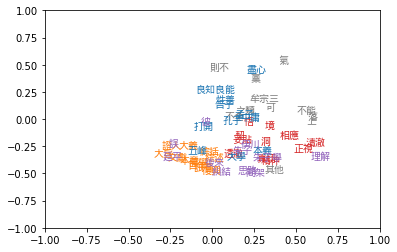

<Figure size 800x800 with 0 Axes>

In [16]:
# plot the result
zhfont = matplotlib.font_manager.FontProperties(fname=fontfile)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont, color='C3')

for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont, color='C1')

for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C7')

for i in index4:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont, color='C0')

for i in index5:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C4')

ax.axis([-1,1,-1,1])
plt.figure(num=None, figsize=(1, 1), dpi=800, facecolor='w', edgecolor='k')
plt.show()

In [17]:
# save
plt.savefig(svgfile, format="svg")

<Figure size 432x288 with 0 Axes>

In [18]:
# model = word2vec.load(fileWord2VecBinPath)
# indexes = model.similar(u'相應', n=10)
# for index in indexes[0]:
#     print(model.vocab[index])

In [19]:
# for vocab in model.vocab:
#     print(vocab)

In [20]:
# model.wv.vocab
# # model.wv.most_similar(positive=u"相應")

In [21]:
from gensim.models import KeyedVectors
#导入模型
model = KeyedVectors.load_word2vec_format(fileWord2VecBinPath, binary=True)

#语料中的词语数
print(len(model.vocab))

7782


In [22]:
#计算两个词语的相似性（这里有点类似于共现性，出现在一起的概率）
print(model.similarity(u'相應', u'儒家'))

0.6778244


/usr/local/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [23]:
#查看词向量
# print(len(model[u'相應']), model[u'相應'])

In [24]:
# 找出气质不合的词语
print(model.doesnt_match([u'相應', u'相契', u'儒學', u'牟宗三']))

牟宗三


/usr/local/lib/python3.7/site-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [25]:
# 近义词最相似的词语
print(model.most_similar(positive=[u'相應', u'相契'], topn=10))

[('深入', 0.8857052326202393), ('順適', 0.8792870044708252), ('契', 0.8755751848220825), ('明澈', 0.8741884231567383), ('挺拔', 0.8577841520309448), ('至此', 0.8576444387435913), ('深遠', 0.8557466864585876), ('真切', 0.855675220489502), ('妥貼', 0.8545790910720825), ('切', 0.8527933359146118)]


In [26]:
# 反义词中最相似的词
print(model.most_similar(negative=[u'相應', u'相契'], topn=10))

[('成言', 0.5484615564346313), ('陽氣', 0.38935962319374084), ('滿心', 0.35222381353378296), ('某物', 0.314438134431839), ('尅', 0.3126828074455261), ('字', 0.3051677942276001), ('少宰', 0.2856703996658325), ('便是', 0.28279832005500793), ('心動', 0.2595939338207245), ('五服', 0.25052353739738464)]


In [27]:
# 反义词中最相似的词
indexes = model.most_similar(negative=[u'彰著'], topn=10)
pd.DataFrame(indexes, columns=['word', 'probability'])

,word,probability
0,少宰,0.752033
1,傳習錄,0.421445
2,橋,0.383017
3,卷,0.366389
4,答,0.362072
5,文,0.357943
6,三,0.351782
7,七十,0.348734
8,前天,0.344679
9,逢,0.341043


In [34]:
# positive和negative可以一起用
print(model.most_similar(positive=[u'康德', u'自由意志'], negative=[u'柏拉圖'], topn=10))

[('特種', 0.8773832321166992), ('我們', 0.8749415278434753), ('純粹理性', 0.8627370595932007), ('呢', 0.8408101797103882), ('意志', 0.8379959464073181), ('批判', 0.833161473274231), ('自由', 0.8303679823875427), ('人們', 0.8297308087348938), ('表明', 0.8294743895530701), ('因果性', 0.8204376697540283)]


In [29]:
print(model.similarity(u'相應', u'契合'))

0.48679644


In [30]:
# 找出所有字的反義詞
for word in model.vocab:
    indexes = model.most_similar(negative=[word], topn=1)
    sWord, prob = indexes[0]
    if prob > 0.8:
#         pf = pd.DataFrame(indexes, columns=['word', 'probability'])
        print(word, sWord, prob)

In [31]:
# 找出所有字的同義詞
for word in model.vocab:
    indexes = model.most_similar(positive=[word], topn=1)
    sWord, prob = indexes[0]
    if prob > 0.9:
#         pf = pd.DataFrame(indexes, columns=['word', 'probability'])
        print(word, sWord, prob)

這 一個 0.9246234893798828
感 寂 0.9323227405548096
太極 無極 0.9029621481895447
存在 所以然 0.9169811010360718
條 段 0.9029197096824646
不已 於穆 0.9561803340911865
中庸 易傳 0.9703227877616882
夫 嘗 0.9019395112991333
他 都 0.9009217619895935
存有 活動 0.9457145929336548
意義 獨立 0.920246958732605
一個 這 0.9246234893798828
寂 感 0.9323227405548096
先生 遺書 0.9217592477798462
它 那 0.9199056029319763
察 涵養 0.9272702932357788
系統 縱貫 0.9675450325012207
那 它 0.9199056625366211
智 禮 0.9363151788711548
涵養 察 0.927270233631134
橫渠 濂溪 0.9172486066818237
答 晦 0.9364859461784363
致知 格物 0.9502143263816833
子 南康 0.9324983954429626
易傳 中庸 0.970322847366333
於穆 不已 0.9561803340911865
客觀 主觀 0.9451209306716919
章 首 0.9228253364562988
格物 致知 0.9502143859863281
卷 朱子語類 0.9793539047241211
活動 存有 0.9457146525382996
辨 讀 0.9104644656181335
本質 關鍵 0.933979868888855
攝 涵 0.9063469767570496
知識 對象 0.9373192191123962
個 都 0.9362032413482666
儒 宋 0.9599668383598328
創造 宇宙 0.9021029472351074
段 第 0.9166768789291382
都 道理 0.9407208561897278
創 生地 0.9004563093185425
儒家 先秦 0.938072

泉 師 0.9397451281547546
熟 下工夫 0.9479146599769592
光 能指 0.9033595323562622
條件 感覺 0.9609542489051819
二程 太極圖說 0.9291574954986572
宜 何足 0.9100967645645142
思考 興趣 0.9380215406417847
清楚 割 0.9095787405967712
裡 裏 0.9181026220321655
端倪 存養 0.9016391634941101
季 蘇 0.9602456092834473
價值 理想 0.9281662702560425
講法 實在論 0.9324783682823181
曉 儘 0.9221407175064087
決不 無論如何 0.9308986663818359
枯槁 稿 0.9256044626235962
第五 第四 0.9740380048751831
子貢 己任 0.929073691368103
子思 曾子 0.9439866542816162
糾結 釐清 0.934643030166626
於是 顛沛 0.9584485292434692
第十 第十五 0.9626436233520508
宋元學案 學案 0.9852688312530518
真是 見到 0.9126681089401245
經過 重新 0.9360272884368896
挺立 成聖 0.9089198112487793
順適 圓熟 0.9075418710708618
哲學 倫理 0.954465925693512
使人 精微 0.9171953797340393
中國 政治 0.9429968595504761
事功 經制 0.9826724529266357
一道 創造性 0.9080237150192261
結果 隔絕 0.9337745308876038
荀子 董仲舒 0.9020987153053284
弊 後生 0.9196373820304871
基本 理想主義 0.9643529653549194
實際 普遍 0.9123184680938721
不免 警 0.9153636693954468
忽 從容 0.9550018310546875
不成 小底 0.9346194267272949
列 宋元學案

任 躋 0.9490236043930054
緣起性空 阿賴耶識 0.911937952041626
渾 罅 0.9279969334602356
京 二十九 0.9801235198974609
知道 便就 0.9590848684310913
衝突 表面 0.9136893153190613
本意 稱賞 0.9009445309638977
戒 慎 0.9460771679878235
覺得 做工夫 0.9615247845649719
厥 后 0.9463517665863037
呈 迭 0.9226125478744507
蕩 淪 0.929877758026123
渠 何其 0.9262839555740356
有病 慰 0.9008460640907288
徹底 澈底 0.9473769664764404
政 三代 0.9573075771331787
二者 叢 0.9318493604660034
含有 顯示 0.9130822420120239
滑 撥 0.9105639457702637
而今 將來 0.9664292335510254
血脈 專一 0.9265821576118469
文集 年譜 0.9691392779350281
歷史 政治 0.9361441135406494
十分 熟習 0.9326899647712708
弟 赤子 0.9510518908500671
想到 弩 0.9131401777267456
磨 積累 0.9516433477401733
那個 這個 0.9255139231681824
隔離 抽象 0.9224379658699036
溺 聲 0.9244182109832764
平靜 心境 0.9807699918746948
涉及 旁 0.9328680038452148
非一 般 0.942453145980835
澄 湛然 0.9026082754135132
孔 李氏 0.9486061334609985
見於 隨喜 0.9364948868751526
情感 來的 0.9124636650085449
未見 距 0.9652646780014038
重新 消化 0.9402592778205872
人類 辨識 0.9417178630828857
遽 忽 0.9548535346984863
在一起

開闢 成聖 0.930570662021637
彌 剛 0.9599045515060425
孟 詆 0.9540108442306519
平等 色相 0.9205213785171509
方叔 余 0.9540773034095764
寫 歲時 0.960680365562439
閑 不屑 0.9307669401168823
回歸 論孟 0.9405615925788879
十八 侯 0.9867281317710876
發揮 看不到 0.9441863894462585
經典 分量 0.9524410367012024
屬性 特性 0.9232842922210693
石 舞雩 0.9573239088058472
西方 獨斷 0.9361839294433594
起信論 真諦 0.968235194683075
倫 情事 0.9309577941894531
今人 甚麼 0.9485605359077454
見道 宏 0.9132696390151978
華嚴 天臺 0.9826884269714355
此類 未曾 0.9442699551582336
反覆 張皇 0.9581397771835327
敬德 祈 0.9546397924423218
佛法 菩薩 0.9536482691764832
屢 胡子 0.9447585940361023
上世 集大成 0.9133323431015015
厚 薄 0.955086886882782
進路 外王 0.9037666320800781
猶如 二乘 0.9449833035469055
四句 童子 0.9508846998214722
洲 梨 0.9931253790855408
不自知 茫昧 0.9357290267944336
示現 功德 0.9188533425331116
批評 簡約 0.948698878288269
辨識 不可理解 0.966134250164032
折 旋 0.9768323302268982
渾然一體 不流 0.9290546774864197
以定 故當 0.9494063258171082
峰 十九 0.9580250382423401
無情 或曰 0.9039540886878967
危坐 驗 0.9454380869865417
立場 準則 0.92620843648

不移 歧義 0.9348351955413818
真實性 尊嚴 0.9373366832733154
義務 法則 0.9394823908805847
一節 樂趣 0.908733069896698
無我 出世 0.9376837015151978
法門 菩薩 0.9043257236480713
湛然 臭 0.9126537442207336
急 願 0.9512014389038086
統一 主客觀 0.9486794471740723
自然主義 既成 0.9301532506942749
泰州 派 0.9815222024917603
生機 不泯 0.9035741686820984
惡惡 好好 0.9440551996231079
底本 領 0.9252169132232666
興起 南宋 0.9581685066223145
朕 漠 0.982151210308075
模稜 隱晦 0.952269971370697
事理 刺激 0.953698992729187
提及 王氏 0.9404658079147339
迷 誣 0.9317898750305176
稟受 物性 0.9009658098220825
勉強 免 0.9265296459197998
宏 不傳 0.9351001977920532
恐懼 慎 0.9399642944335938
穿 渠 0.9234877824783325
丈 蒙 0.9815083742141724
相傳 欽 0.9488512277603149
不遠 侮 0.9744611978530884
心念 憑依 0.9145479202270508
久之 力行 0.9610244035720825
任何人 辨識 0.9403927326202393
普遍化 歸納 0.9703595638275146
無論如何 比較 0.9648920297622681
聯 考證 0.9187805652618408
資質 附子 0.948209285736084
從而 悔 0.9723039269447327
從未 稱許 0.9245200753211975
枯 稿 0.9678442478179932
止觀 大乘 0.9385470151901245
永遠 步步 0.9031568765640259
有能 文義 0.93966305255

程明道 保存 0.944497287273407
漢 紙 0.9500890970230103
自持 凸現 0.9356476068496704
庶 優游 0.9619412422180176
空言 登 0.9569675922393799
思索 大病 0.9272021055221558
具備 進來 0.9271237850189209
葉適 陋 0.9367175698280334
有何不可 陋 0.9586073160171509
心地 細密 0.9549983143806458
憑藉 明鏡 0.9723052978515625
不可為 大黃 0.9539743065834045
心思 十七歲 0.963800847530365
化生 男女 0.9170757532119751
十年 汗 0.9465500712394714
不屬 一對 0.9092561602592468
卻說 闕 0.9698529243469238
坎 陷 0.9271019697189331
柔 邦 0.9522066116333008
何事 走作 0.9440720081329346
凸出 極致 0.9292292594909668
無乃 從容 0.9443018436431885
他日 大要 0.9727510213851929
大都 早 0.9625334739685059
面前 而今 0.9148080348968506
病痛 行將 0.9222186207771301
故而 推演 0.9593154191970825
銘 欽 0.9665524959564209
忿 悔 0.9579336643218994
門者 麼 0.9540796875953674
一德 相成 0.9296612739562988
答問 三書 0.9774317145347595
己見 消長 0.959806501865387
說破 不見得 0.9624361395835876
原頭 件件 0.9841529726982117
疏通 綜述 0.9669890999794006
拆穿 考察 0.9269202947616577
最好 順義 0.9234119653701782
至今 審問 0.9378563165664673
一番 不見得 0.9508522748947144
空空 寂寂 0.907271

細密 積累 0.9572442173957825
沙 功德 0.9231562614440918
印度 造詣 0.9574993252754211
玩 只得 0.9168663024902344
祖述 尤為 0.9378975629806519
光明正大 化性 0.9015331268310547
別扭 彖傳 0.9061185717582703
大底 塊 0.9739415049552917
毋 文明 0.9374329447746277
蓋人 職 0.9321472644805908
無端 卓然 0.9328149557113647
非禮 匆 0.9282863140106201
畔 岸 0.9858365058898926
撰 三三 0.9259034395217896
握 重重 0.9156997203826904
尖 放過 0.9678383469581604
藉以 豁 0.955560028553009
天才 特徵 0.9198570847511292
遠近 長短 0.9347646236419678
無義 以方 0.912270188331604
手足 痺 0.931467592716217
春秋 周公 0.9606946706771851
難看 本色 0.9271165132522583
寬 惠 0.9661601781845093
前輩 顛倒 0.9543171525001526
弱 沈雄 0.9513342976570129
大綱 樣 0.9445364475250244
比配 改為 0.9074724912643433
恨 狂 0.9546429514884949
丙戌 京 0.9739851951599121
濟 恥 0.9216991066932678
變為 人情 0.9469603896141052
己丑 年 0.9616626501083374
剔 剝 0.9784194231033325
謝顯 記憶 0.9859799742698669
徹 且是 0.9269387722015381
蓍 卦 0.9133566617965698
無餘 釘 0.9336227774620056
千萬 心法 0.9370051622390747
實用 詬 0.9353446960449219
清氣 結聚 0.9251900911331177
頃刻 停息 

番 評論 0.9759673476219177
蓋因 責任 0.9522855281829834
輕鬆 此類 0.9379740357398987
情意 知識論 0.9484426379203796
實意 李翱 0.9162715673446655
維 明命 0.9368119835853577
鄭重 圈 0.9333051443099976
桎梏 之上 0.9042065143585205
問心 袞 0.9223580360412598
一以貫之 子之 0.9164921045303345
異同 輒 0.9562464356422424
昏明 強弱 0.9058465361595154
基於 德國 0.96294766664505
子弟 尤為 0.9477232694625854
動意 著眼 0.9061987400054932
無任 是因為 0.9091457724571228
只得 宇 0.9498339891433716
收拾 些子 0.9635912775993347
非獨 何謂 0.9026056528091431
怵惕 井 0.951951265335083
蔓 刺 0.9624487161636353
倣 模寫 0.9257509112358093
糾 紛 0.973563551902771
禪定 及門 0.9220441579818726
印證 擴大 0.9072218537330627
大可 伐 0.9516929388046265
既已 躁 0.9425442218780518
環繞 謨 0.9243706464767456
怨 術 0.9344778060913086
一方面 副 0.9327946901321411
類聚 全文 0.914072573184967
當即 像是 0.9249985218048096
理學 膚淺 0.9542742967605591
相成 外交 0.9697619080543518
嚼舌 牙 0.9912171363830566
鄙 不遠 0.9701662063598633
教訓 壞事 0.9220530986785889
塊然 袞 0.9287950992584229
拜 鄒 0.9675164222717285
不勝 大率 0.938369870185852
昨 翁 0.915358304977417
修辭

愉快 令人 0.9385878443717957
擬 塌 0.929373025894165
脾性 性向 0.9818795919418335
大要 他日 0.9727510213851929
防 紛亂 0.9586188793182373
高一 負面 0.934547483921051
卓然 膠 0.9489720463752747
車 舟 0.9656944870948792
用盡 功用 0.908644437789917
乃至於 雷 0.9190841913223267
弩 瞠 0.985871434211731
衝破 判斷 0.9486473202705383
大過 獸 0.9577946066856384
人情 變為 0.94696044921875
邵 學記 0.9436709880828857
處於 塌 0.9014719128608704
右 號 0.9720534086227417
立志 言語 0.9620508551597595
分說 顢頇 0.9356095790863037
舟 車 0.9656944870948792
一十 十三 0.9743989109992981
越過 結果 0.9017111659049988
講解 查 0.9375276565551758
羅先 豫章 0.912529468536377
呼 火 0.9265097975730896
全宇 宙 0.9647080898284912
時變 節目 0.9510487914085388
騰 子細 0.9310299754142761
情實 下愚不移 0.9173120260238647
周公孔 湯 0.9793918132781982
指歸 得出 0.9251587986946106
推演 模 0.964763879776001
侍 范 0.9560003280639648
無上 基於 0.9493963718414307
靜觀 顯示 0.9014082551002502
生發 無色 0.918304979801178
善言 尤為 0.9543163776397705
若干 最為 0.9522688388824463
醫家 不若 0.9257429838180542
大路 溫和 0.9475052952766418
潔淨 適應 0.9140905141830444
創發 預設

塵 閣 0.9288879632949829
不以為 值得 0.9289788603782654
猛省 沈 0.923089325428009
執中 饑 0.9517946243286133
表意 何之 0.9077475070953369
謨 諾 0.9706394672393799
在行 凸現 0.9173615574836731
外延 自然主義 0.91632080078125
稱賞 承接 0.9360456466674805
連屬 困難 0.9132285714149475
脫然 下工夫 0.9359753131866455
初步 透露 0.9266821146011353
可惡 惡言 0.9146090745925903
成命 玄德 0.9186273813247681
相者 業相 0.9543575644493103
言語道斷 出世 0.9270221590995789
逸 李 0.9530699849128723
嗎 能指 0.9581717848777771
封閉 目的論 0.9490681290626526
那麼 美的 0.9515088796615601
千言萬語 杜撰 0.9663842916488647
抄 無幾 0.9522315263748169
堅持 反動 0.9466454982757568
疑問 邁 0.907461941242218
韓 書報 0.9556008577346802
好是 懿德 0.9792231321334839
御 箕踞 0.9533016681671143
誠然 穎悟 0.9518932104110718
堪 一個人 0.9024906754493713
不犯 做手 0.9632889628410339
自流 不要 0.9383012056350708
不該 苦心 0.9699640870094299
惹 一齊 0.9008989334106445
領略 大都 0.9429886341094971
空宗 中國人 0.9594173431396484
重複 甚佳 0.9475449323654175
撮 滋味 0.9663565158843994
為害 白鹿洞 0.9585867524147034
曲曲折折 可能性 0.9205277562141418
德廣 大旨 0.9547138214111328
神氣 升降

寅 獲得 0.9055787920951843
心安 無時 0.9235209822654724
徵引 佳 0.9458456039428711
而今而後 得所 0.9207801222801208
等待 紛紜 0.9554174542427063
做事 些子 0.953005850315094
險阻 遭遇 0.9214985370635986
魚躍 鳶飛戾天 0.9903769493103027
布散 開說 0.9490110874176025
深微 譯本 0.9197193384170532
接著 推尋 0.9245817065238953
檢查 解決 0.9297559261322021
天時 行人 0.9514597654342651
鳥 今文 0.9788410067558289
蒸民 公西華 0.9324892163276672
鄙陋 葉氏 0.9520837664604187
即將 始於 0.9041853547096252
三章 一十 0.9479213953018188
懿德 好是 0.9792231321334839
少有 切己 0.9571982026100159
畔援 歆羨 0.9711164236068726
要則 域 0.9341675043106079
古文 師德 0.9860836267471313
邁 何足 0.9532569050788879
禮義 卑 0.964384138584137
樂趣 番 0.9669690728187561
磚 階 0.9677916765213013
朱子語錄 壬午 0.9641111493110657
椽 積 0.9376933574676514
說夢 獅子 0.9796178340911865
出道 原理 0.9155540466308594
立地 柔 0.9121562242507935
勸誘 招徠 0.9853389263153076
二十八 黃 0.9747542142868042
行將 聖所 0.9321080446243286
宛然 那麼 0.9118477702140808
感覺到 穎悟 0.948113739490509
愿 召 0.9785407781600952
為名 不異 0.9115775227546692
互用 大黃 0.9164769649505615
值得 詭 0.95

自然系統 相接 0.9592664241790771
適應 知事 0.9195087552070618
專門 假定 0.9234027862548828
忘記 誤認為 0.9469334483146667
割裂 反映 0.9220237731933594
撥開 趣 0.9530459642410278
仗 凝結 0.9070172309875488
突進 凸出 0.913541316986084
追求 限度 0.9392224550247192
止息 自如 0.9050928950309753
牽涉 勁道 0.9427785277366638
簡述 媒介 0.9193803071975708
站 為什麼 0.9554475545883179
不自然 混雜 0.9195300340652466
荒謬 不走 0.9452938437461853
根器 無力 0.9509150981903076
中華民族 豁 0.9619008302688599
學說 古文尚書 0.9425350427627563
萊 呂范 0.9686545729637146
夢見 觀書 0.9718281030654907
夷狄 斯文 0.9162559509277344
俾 豈弟君子 0.9690479636192322
解字 放緩 0.9439303874969482
商書 今文 0.9906764030456543
蔡沈 猷 0.952295184135437
周書 今文 0.9920786619186401
三一 三三 0.9669545888900757
經文 開端 0.954741358757019
合用 振 0.9322693347930908
威 安安 0.9751031398773193
鄭 師德 0.9776519536972046
綜觀 全文 0.9594608545303345
定命 太甲 0.9323344230651855
享 自處 0.95754075050354
安安 召 0.9848655462265015
溫恭 文明 0.9858790636062622
玄德 溫恭 0.9558073878288269
激情 可不 0.9134252071380615
皇矣 文明 0.9780186414718628
精純 皮毛 0.9358005523681641
儼然 鳴 0

岑 劇論 0.9696844816207886
皮 積習 0.9579424858093262
每人 原則上 0.9068969488143921
看起來 顯得 0.9522969126701355
六十五 歲時 0.9632119536399841
盈虛 拘於 0.9520328640937805
和詩 李 0.9566352367401123
胡亂 走作 0.9695658087730408
鑛 模 0.9082299470901489
柴 剛 0.9294014573097229
漏 大底 0.9330362677574158
動機 目的論 0.962361216545105
兀坐 滋 0.9265364408493042
鬥 訓練 0.9568831920623779
殄滅 惟恐 0.9714670777320862
設定 某種 0.9693759679794312
傳注 留情 0.982033371925354
他心 懸空 0.9128365516662598
選 右 0.9556600451469421
功力 軒翥 0.928458034992218
俊德 今文 0.980643630027771
今世 屋 0.9603171944618225
便當 常行 0.9113640189170837
日益 責任 0.9711450338363647
交錯 造作 0.917849600315094
留情 傳注 0.9820334911346436
暮 劇論 0.9558165073394775
暑 呼 0.9181934595108032
照管 久之 0.9418888092041016
無誤 分疏 0.9199333190917969
萬方 俗 0.9694809913635254
尋常 玩味 0.9425942301750183
有孝 幾曾 0.9448134303092957
書札 論學 0.955545961856842
良久 頃 0.9327095150947571
炳然 一味 0.9089023470878601
民用 愿 0.9362883567810059
修己 居處 0.9131847620010376
擰 地平說 0.9262826442718506
大經 中天 0.943372368812561
目的論 美的 0.9651339650154

綱要 一發 0.9495443105697632
興會 引申 0.9102624654769897
藏識 不空如來藏 0.9335231184959412
及第 開頭 0.9526197910308838
貝 四方 0.9690786600112915
皮毛 骨肉 0.9836090803146362
先發 顯得 0.9171695709228516
茫 岸 0.9449220895767212
葬 賞 0.9243828058242798
分辨 崖 0.9276561737060547
透過 限度 0.953877329826355
痛感 此致 0.9009783267974854
倦 年壽 0.9436620473861694
本書 相比 0.9410700798034668
有趣 泰州 0.9000663757324219
門庭 萊 0.9617916345596313
天成 惟精惟一 0.9460051655769348
辛巳 問答 0.9353408217430115
生民 商書 0.9436765909194946
顯者 轉移 0.906043291091919
王浚 川 0.9645339250564575
抉擇 庶 0.9152776002883911
無幾 張皇 0.9531760811805725
年間 王門 0.9642609357833862
合併 簡約 0.9140533208847046
烘托 結集 0.954918384552002
上治 慾 0.9348174333572388
考古 仰 0.9163515567779541
新儒學 大家 0.9670506715774536
橫生枝節 羅念菴 0.9100608229637146
